In [1]:
import pandas as pd
import numpy as np
from path import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
file_path = Path("../Resources/categorical_df.csv")
df = pd.read_csv(file_path)
df.head()

,PdId,IncidntNum,Category,Descript,PdDistrict,Month,DayOfWeek,Time_of_Day,Address,ZipCode,Resolution,Categories,Descriptions,PdDistricts,Months,Day,TimeOfDay,Resolutions
0,12005827212120,120058272,WEAPON LAWS,OTHER,SOUTHERN,Jan,Friday,Morning,800 Block of BRYANT ST,94103,"ARREST, BOOKED",16,25,7,4,0,2,0
1,12005827212168,120058272,WEAPON LAWS,OTHER,SOUTHERN,Jan,Friday,Morning,800 Block of BRYANT ST,94103,"ARREST, BOOKED",16,25,7,4,0,2,0
2,14105926363010,141059263,WARRANTS,WARRANT ARREST,BAYVIEW,Apr,Monday,Afternoon,KEITH ST / SHAFTER AV,94124,"ARREST, BOOKED",15,39,0,0,1,0,0
3,16001366271000,160013662,NON-CRIMINAL,LOST PROPERTY,TENDERLOIN,Jan,Tuesday,Evening,JONES ST / OFARRELL ST,94108,NONE,6,19,9,4,5,1,1
4,16000274071000,160002740,NON-CRIMINAL,LOST PROPERTY,MISSION,Jan,Friday,Night,16TH ST / MISSION ST,94102,NONE,6,19,3,4,0,3,1


In [3]:
df.PdDistrict.unique()

array(['SOUTHERN', 'BAYVIEW', 'TENDERLOIN', 'MISSION', 'NORTHERN',
       'TARAVAL', 'INGLESIDE', 'CENTRAL', 'RICHMOND', 'PARK'],
      dtype=object)

In [4]:
df.PdDistricts.unique()

array([7, 0, 9, 3, 4, 8, 2, 1, 6, 5])

In [5]:
test_keys = [7, 0, 9, 3, 4, 8, 2, 1, 6, 5]
test_values = [94103, 94124, 94108, 94102, 94109, 94158, 94122, 94116, 94112,
       94104, 94110, 94132, 94114, 94131, 94134, 94117, 94115, 94105,
       94127, 94118, 94111, 94123, 94107, 94130, 94129]

In [6]:
test_values.sort()
test_values

[94102,
 94103,
 94104,
 94105,
 94107,
 94108,
 94109,
 94110,
 94111,
 94112,
 94114,
 94115,
 94116,
 94117,
 94118,
 94122,
 94123,
 94124,
 94127,
 94129,
 94130,
 94131,
 94132,
 94134,
 94158]

In [7]:
res = {} 
for key in test_keys: 
    for value in test_values: 
        res[key] = value 
        test_values.remove(value) 
        break  

In [8]:
res

{7: 94102,
 0: 94103,
 9: 94104,
 3: 94105,
 4: 94107,
 8: 94108,
 2: 94109,
 1: 94110,
 6: 94111,
 5: 94112}

In [9]:
#pd district zipcode dictionaries. single digit number corresponds to pd district 
# {'7': 94103,
#  '0': 94124,
#  '9': 94108,
#  '3': 94102,
#  '4': 94109,
#  '8': 94158,
#  '2': 94122,
#  '1': 94116,
#  '6': 94112,
#  '5': 94104}

#  {7: 94103,
#  0: 94124,
#  9: 94108,
#  3: 94102,
#  4: 94109,
#  8: 94158,
#  2: 94122,
#  1: 94116,
#  6: 94112,
#  5: 94104}

IndentationError: unexpected indent (<ipython-input-9-c1b6dc4ea780>, line 12)

In [10]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.decomposition import PCA

In [11]:
encoded_df = pd.read_csv('/Users/bkirton/Desktop/sanFranCrimePredictor/Resources/encoded_df.csv')


In [12]:
encoded_df.head()

,Categories,Descriptions,PdDistricts,Months,Day,TimeOfDay,ZipCode,Resolutions
0,16,25,7,4,0,2,94103,0
1,16,25,7,4,0,2,94103,0
2,15,39,0,0,1,0,94124,0
3,6,19,9,4,5,1,94108,1
4,6,19,3,4,0,3,94102,1


In [14]:
#create features
X = encoded_df.drop("Resolutions", axis=1)

#create target
y = encoded_df["Resolutions"]

In [15]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020, test_size=0.5)

In [16]:
#train the model
brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

In [17]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_test,y_pred)
print(f"balanced accuracy score = {balanced_acc_score*100:.2f}%")

balanced accuracy score = 83.57%


In [18]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Acutal 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_df)

,Predicted 0,Predicted 1
Acutal 0,16624,3019
Actual 1,9442,44513


In [19]:
# Print the imbalanced classification report
print("imbalanced classification report")
print(classification_report_imbalanced(y_test,y_pred))

imbalanced classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.64      0.85      0.83      0.73      0.84      0.70     19643
          1       0.94      0.83      0.85      0.88      0.84      0.70     53955

avg / total       0.86      0.83      0.84      0.84      0.84      0.70     73598



In [20]:
df_cov_matrix = np.cov(X.T)
df_cov_matrix


array([[ 1.79642997e+01,  1.24382865e+01, -4.13692019e-01,
         5.32515065e-03,  1.15512945e-01,  6.13917033e-02,
         1.30831155e+00],
       [ 1.24382865e+01,  8.94413882e+01, -1.82309158e-01,
         4.25978494e-02,  2.71738380e-01,  1.02837615e-01,
         1.30522958e+00],
       [-4.13692019e-01, -1.82309158e-01,  7.73161940e+00,
        -6.26487769e-02,  4.09348237e-02, -3.43945457e-02,
        -7.98895320e+00],
       [ 5.32515065e-03,  4.25978494e-02, -6.26487769e-02,
         1.19897038e+01,  8.81438889e-02,  2.19238037e-02,
         3.08494432e-01],
       [ 1.15512945e-01,  2.71738380e-01,  4.09348237e-02,
         8.81438889e-02,  4.07618479e+00, -2.65877045e-02,
         1.89176219e-01],
       [ 6.13917033e-02,  1.02837615e-01, -3.43945457e-02,
         2.19238037e-02, -2.65877045e-02,  1.16462308e+00,
         1.19354049e-01],
       [ 1.30831155e+00,  1.30522958e+00, -7.98895320e+00,
         3.08494432e-01,  1.89176219e-01,  1.19354049e-01,
         1.4074403

In [21]:
#calculate eigenvectors and eigenvalues on covariance matrix
eig_vals, eig_vecs = np.linalg.eig(df_cov_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('Eigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.36747408e-02 -1.66177861e-01 -9.85317520e-01  3.01180782e-03
   6.59186474e-03  3.59829211e-02  1.07112324e-04]
 [ 2.86239765e-02 -9.85615934e-01  1.66487870e-01  7.50915135e-04
   2.20710071e-03 -4.23274849e-03 -5.79574151e-04]
 [-5.97660748e-02  5.00259037e-05  3.56870794e-02 -4.23588383e-03
   1.72911202e-02  9.97374502e-01 -9.03453857e-03]
 [ 2.42067690e-03 -4.24527554e-04  6.23196898e-04  2.05558079e-03
   1.11366615e-02  8.99578035e-03  9.99892193e-01]
 [ 1.42739554e-03 -3.21708523e-03 -5.50778242e-03 -9.35903166e-03
  -9.99718183e-01  1.76743567e-02  1.09935633e-02]
 [ 8.91655732e-04 -1.19376176e-03 -2.93471491e-03 -9.99940130e-01
   9.32944577e-03 -4.23200627e-03  1.98900718e-03]
 [ 9.97703861e-01  3.05645409e-02  1.08752345e-02  5.85487835e-04
   2.27704913e-03  5.93312623e-02 -2.96953400e-03]]
Eigenvalues 
[141.27910281  91.49908449  15.86398641   1.16385144   4.07295052
   7.24253193  11.99034228]


In [22]:
#sort eigenvalues in decreasing order. first value is most significant and forms our first principal component
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
141.2791028063714
91.49908449055023
15.863986405327603
1.1638514371678854
4.072950523921879
7.242531926457218
11.990342275347041


In [23]:
#selecting the number of principal components
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n", var_exp)
print("Cumulative variance captured as we travel with each component \n", cum_var_exp)

Variance captured by each component is 
 [51.72939324168174, 33.50242200612332, 5.808604208554443, 4.390268046321539, 2.651855615211652, 1.4913122685570084, 0.42614461355029826]
Cumulative variance captured as we travel with each component 
 [ 51.72939324  85.23181525  91.04041946  95.4306875   98.08254312
  99.57385539 100.        ]


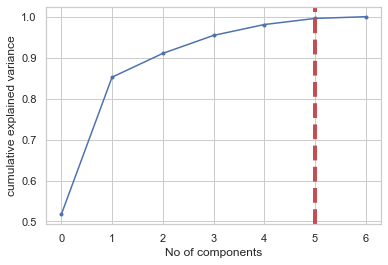

In [24]:
# 98.1% of the variance is captured with 5 components. 

#visualize above on a graph
pca = PCA().fit(X)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_)[0:15], marker='.')
plt.xlabel('No of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle='--', x=5, ymin=0, ymax=1)
plt.savefig("/Users/bkirton/Desktop/sanFranCrimePredictor/images/PCA_graph.png")
plt.show()

In [25]:
#initialize PCA model
pca = PCA(n_components=6)

crime_pca = pca.fit_transform(X)

In [26]:
columns = X.columns
columns

Index(['Categories', 'Descriptions', 'PdDistricts', 'Months', 'Day',
       'TimeOfDay', 'ZipCode'],
      dtype='object')

In [27]:
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
pca_df.head(50)

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.517294,0.517294
1,0.852318,0.335024
2,0.910404,0.058086
3,0.954307,0.043903
4,0.980825,0.026519
5,0.995739,0.014913


In [28]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca.components_, columns=columns, index=pca_dims)
pca_test_df.head(50).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5
Categories,0.013675,-0.166178,0.985318,-0.000107,0.035983,-0.006592
Descriptions,0.028624,-0.985616,-0.166488,0.000580,-0.004233,-0.002207
PdDistricts,-0.059766,0.000050,-0.035687,0.009035,0.997375,-0.017291
Months,0.002421,-0.000425,-0.000623,-0.999892,0.008996,-0.011137
Day,0.001427,-0.003217,0.005508,-0.010994,0.017674,0.999718
TimeOfDay,0.000892,-0.001194,0.002935,-0.001989,-0.004232,-0.009329
ZipCode,0.997704,0.030565,-0.010875,0.002970,0.059331,-0.002277


In [29]:
# List the features sorted in descending order by feature importance
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
features = X.columns
importances = brf.feature_importances_
indices = np.argsort(importances)[::-1]

#print feature rankings
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f+1, features[f], importances[indices[f]]))

Feature ranking:
1. Categories (0.319765)
2. Descriptions (0.263453)
3. PdDistricts (0.133189)
4. Months (0.094816)
5. Day (0.082600)
6. TimeOfDay (0.057130)
7. ZipCode (0.049046)


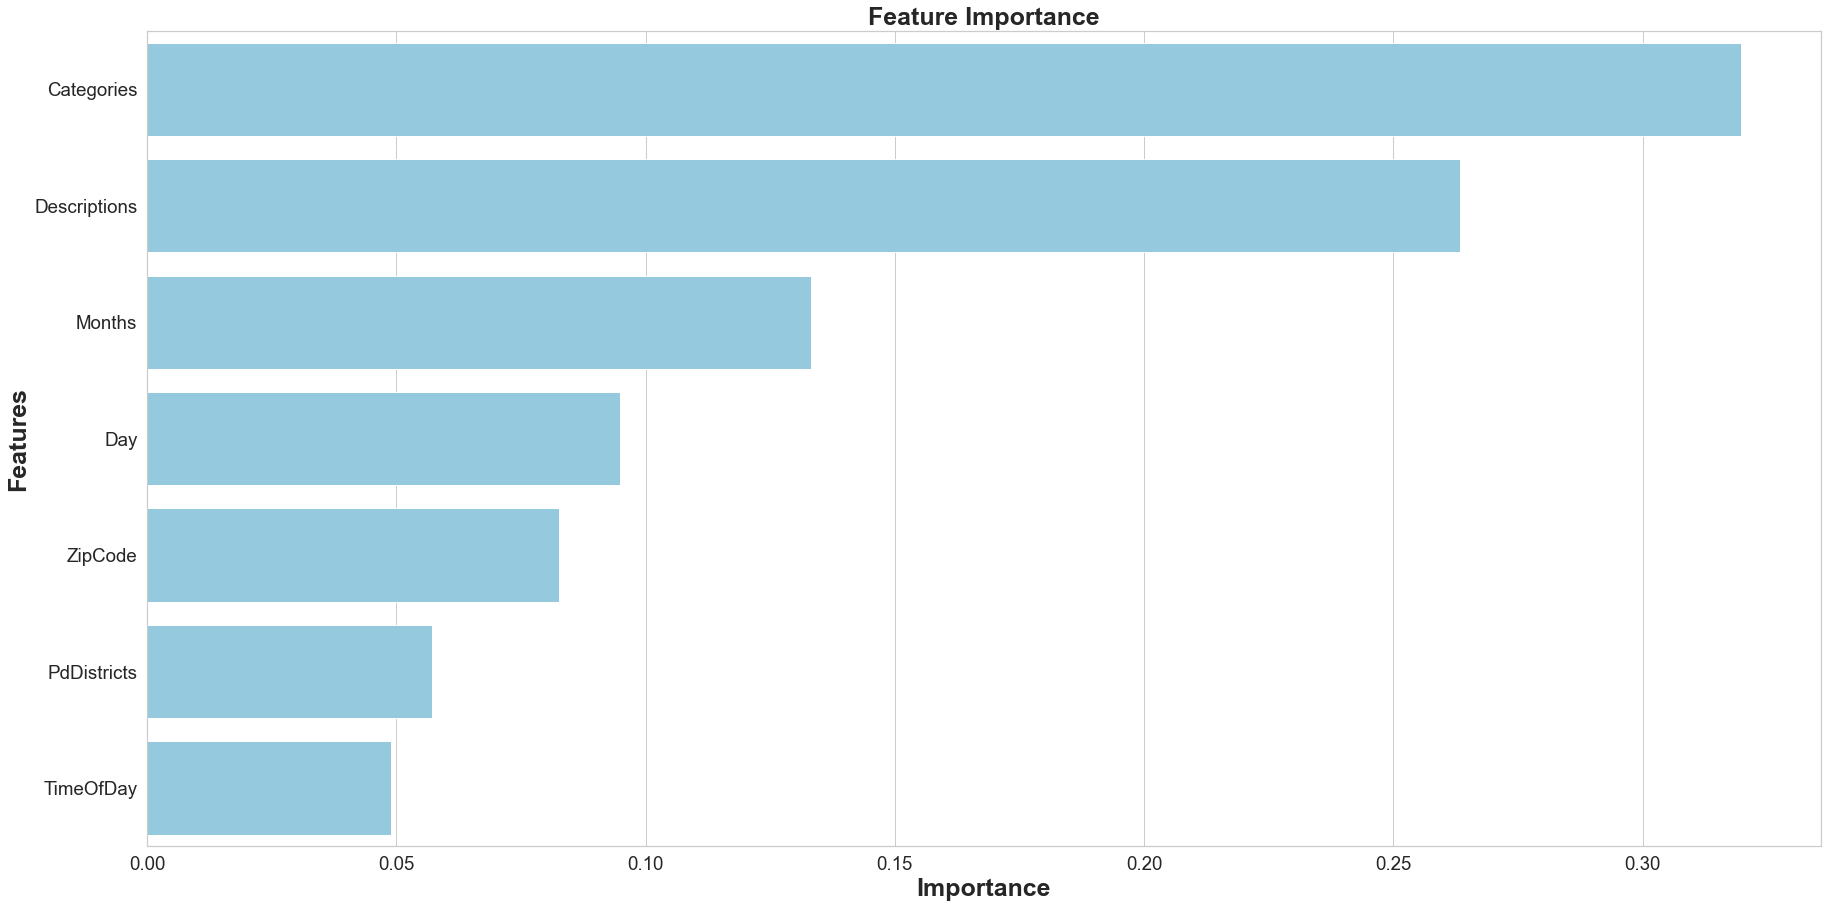

None

,Features,Gini-Importance
0,Categories,0.319765
1,Descriptions,0.263453
2,Months,0.133189
3,Day,0.094816
4,ZipCode,0.082600
5,PdDistricts,0.057130
6,TimeOfDay,0.049046


In [30]:
#https://towardsdatascience.com/machine-learning-step-by-step-6fbde95c455a
feats = {}
for feature, importance in zip(X.columns, brf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.savefig("/Users/bkirton/Desktop/sanFranCrimePredictor/images/GINI_graph.png")
display(plt.show())
display(importances)

In [31]:
X

,Categories,Descriptions,PdDistricts,Months,Day,TimeOfDay,ZipCode
0,16,25,7,4,0,2,94103
1,16,25,7,4,0,2,94103
2,15,39,0,0,1,0,94124
3,6,19,9,4,5,1,94108
4,6,19,3,4,0,3,94102
...,...,...,...,...,...,...,...
147190,0,3,5,2,0,1,94118
147191,6,19,1,2,0,2,94104
147192,4,28,1,2,4,1,94108
147193,4,16,1,2,0,2,94108


In [32]:
df = pd.DataFrame(data = crime_pca)
df['Resolutions'] = encoded_df['Resolutions']
df.head()

,0,1,2,3,4,5,Resolutions
0,-10.098873,-6.210892,8.733527,1.560872,2.287874,-3.043409,0
1,-10.098873,-6.210892,8.733527,1.560872,2.287874,-3.043409,0
2,11.648293,-19.200963,5.440940,5.560765,-3.552877,-1.931573,0
3,-5.532132,1.502613,-0.221867,1.538404,4.337450,1.997705,1
4,-11.165112,1.332624,0.035837,1.517369,-2.099620,-2.902135,1


In [33]:
#create features
X = df.drop("Resolutions", axis=1)

#create target
y = df["Resolutions"]

In [34]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5)

In [35]:
# train the classifier
brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

In [36]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_test,y_pred)
print(f"balanced accuracy score = {balanced_acc_score*100:.2f}%")

balanced accuracy score = 83.04%


In [37]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Acutal 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_df)

,Predicted 0,Predicted 1
Acutal 0,16548,3148
Actual 1,9672,44230


In [38]:
# Print the imbalanced classification report
print("imbalanced classification report")
print(classification_report_imbalanced(y_test,y_pred))

imbalanced classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.63      0.84      0.82      0.72      0.83      0.69     19696
          1       0.93      0.82      0.84      0.87      0.83      0.69     53902

avg / total       0.85      0.83      0.83      0.83      0.83      0.69     73598



In [39]:
from pprint import pprint

In [41]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(brf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'replacement': False,
 'sampling_strategy': 'auto',
 'verbose': 0,
 'warm_start': False}


In [42]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
brf = BalancedRandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
brf_random = RandomizedSearchCV(estimator = brf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
brf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 30.4min finished


RandomizedSearchCV(cv=3, estimator=BalancedRandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [46]:
brf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}